In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record

'1.0.3'

In [3]:
df = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
#df = df.loc['2012-01-01':,:]
df.shape
df.head(3)
df.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


---

#### Using this dataframe, we can of course plot a basic ohlc or candlestick plot:



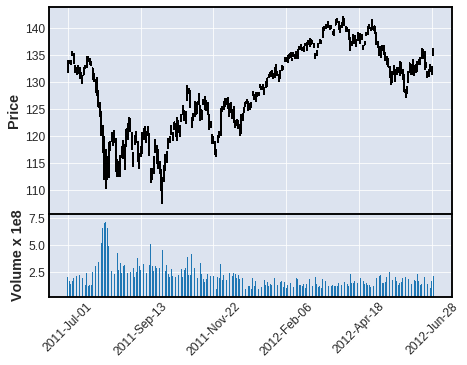

In [4]:
import mplfinance as mpf

mpf.plot(df,volume=True)

In [5]:
df.shape
df.columns

(252, 9)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'UpperB',
       'LowerB', 'PercentB'],
      dtype='object')

In [6]:
ndf = df[df.columns[[0,1,2,3,5]]].copy()

In [7]:
ndf.head(3)
ndf.shape

,Open,High,Low,Close,Volume
Date,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,202385700
2011-07-05,133.779999,134.080002,133.389999,133.809998,165936000
2011-07-06,133.490005,134.139999,133.110001,133.970001,143331600


(252, 5)

In [8]:
#mpf.plot(ndf.tail(30),type='candle')

In [9]:
s1 = pd.Series(df['UpperB'].iloc[0:70])
s2 = pd.Series(df['LowerB'].iloc[30:100])

In [10]:
s1.head(2)
s1.tail(2)
s2.head(2)
s2.tail(2)
af = ndf.iloc[20:60].copy()
af.head(2)
af.tail(2)

Date
2011-07-01    132.373927
2011-07-05    133.254297
Name: UpperB, dtype: float64

Date
2011-10-07    122.666859
2011-10-10    122.974478
Name: UpperB, dtype: float64

Date
2011-08-15    110.401081
2011-08-16    109.919975
Name: LowerB, dtype: float64

Date
2011-11-18    120.990128
2011-11-21    120.045082
Name: LowerB, dtype: float64

,Open,High,Low,Close,Volume
Date,,,,,
2011-08-01,130.839996,130.960007,127.529999,128.779999,325790900
2011-08-02,127.809998,128.500000,125.489998,125.489998,346653800


,Open,High,Low,Close,Volume
Date,,,,,
2011-09-23,112.110001,114.160004,112.019997,113.540001,307242500
2011-09-26,114.610001,116.400002,112.980003,116.239998,260673700


In [11]:
ds1 = pd.DataFrame(s1)
ds1.head()

,UpperB
Date,
2011-07-01,132.373927
2011-07-05,133.254297
2011-07-06,134.040915
2011-07-07,135.077014
2011-07-08,135.721110


In [12]:
len(s1)
len(af)

70

40

In [13]:
s1orig = s1.copy()

In [14]:
s1 = s1orig.iloc[0:35]
s1.head(1)
s1.tail(1)
af.head(1)
af.tail(1)
mf = pd.merge(s1,af,how='outer',on='Date',sort=True)#,left_index=True)

Date
2011-07-01    132.373927
Name: UpperB, dtype: float64

Date
2011-08-19    136.263091
Name: UpperB, dtype: float64

,Open,High,Low,Close,Volume
Date,,,,,
2011-08-01,130.839996,130.960007,127.529999,128.779999,325790900


,Open,High,Low,Close,Volume
Date,,,,,
2011-09-26,114.610001,116.400002,112.980003,116.239998,260673700


In [15]:
mf.head(2)
mf.tail(2)

,UpperB,Open,High,Low,Close,Volume
Date,,,,,,
2011-07-01,132.373927,NaN,NaN,NaN,NaN,NaN
2011-07-05,133.254297,NaN,NaN,NaN,NaN,NaN


,UpperB,Open,High,Low,Close,Volume
Date,,,,,,
2011-09-23,NaN,112.110001,114.160004,112.019997,113.540001,307242500.0
2011-09-26,NaN,114.610001,116.400002,112.980003,116.239998,260673700.0


In [16]:
#mf

In [17]:
STOP HERE

SyntaxError: invalid syntax (<ipython-input-17-a6774c8535dd>, line 1)

In [ ]:
apds = [ mpf.make_addplot(tcdf),
         mpf.make_addplot(low_signal,scatter=True,markersize=200,marker='^'),
         mpf.make_addplot(high_signal,scatter=True,markersize=200,marker='v'),
         mpf.make_addplot((df['PercentB']),panel='lower',color='g')
       ]

mpf.plot(df,addplot=apds,figscale=1.3,volume=True)

In [ ]:
apds = [ mpf.make_addplot(tcdf,linestyle='dashdot'),
         mpf.make_addplot(low_signal,scatter=True,markersize=200,marker='^'),
         mpf.make_addplot(high_signal,scatter=True,markersize=200,marker='v'),
         mpf.make_addplot((df['PercentB']),panel='lower',color='g',linestyle='dotted')
       ]

mpf.plot(df,addplot=apds,figscale=1.5,volume=True,style='starsandstripes')